# ECE 498 DS Mini Project 2

# Group Members:
## Rishabh Gupta (rishabh7)
## Abhinavi Madireddy (am49)
## Yasaswi Boyapati (yasaswi7)

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from seaborn import heatmap as hmap
from scipy.stats import ks_2samp as ks2
from sklearn.decomposition import PCA as pca
from sklearn.manifold import TSNE as tsne
from sklearn.cluster import KMeans as kmeans
from sklearn.mixture import GaussianMixture as gm
from sklearn.cluster import AgglomerativeClustering as ac

- numpy: 1.18.1
- pandas: 1.0.0
- matplotlib: 3.1.2
- sklearn: 0.21.3
- seaborn: 0.10.0
- scipy: 1.4.1

# Task 1: Data Cleaning and Visual Inspection

## 0. Getting Started With the Data

In [2]:
df_ra_he0 = pd.read_csv('Data/RelativeAbundance_HE0.csv', sep=',', index_col='Microbe Name')
df_ra_he1 = pd.read_csv('Data/RelativeAbundance_HE1.csv', sep=',', index_col='Microbe Name')
df_bi_he0 = pd.read_csv('Data/BayesInferenceHE0.csv',     sep=',', index_col='SampleName')
df_bi_he1 = pd.read_csv('Data/BayesInferenceHE1.csv',     sep=',', index_col='SampleName')
df_qa     = pd.read_csv('Data/QualityControl.csv',        sep=',')

df_ra_he0.head()

,HE0Sample_0,HE0Sample_1,HE0Sample_2,HE0Sample_3,HE0Sample_4,HE0Sample_5,HE0Sample_6,HE0Sample_7,HE0Sample_8,HE0Sample_9,...,HE0Sample_754,HE0Sample_755,HE0Sample_756,HE0Sample_757,HE0Sample_758,HE0Sample_759,HE0Sample_760,HE0Sample_761,HE0Sample_762,HE0Sample_763
Microbe Name,,,,,,,,,,,,,,,,,,,,,
Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter,0.004239,0.004345,0.004423,0.004463,0.005372,0.004136,0.004457,0.004049,0.004638,0.004429,...,0.004464,0.004636,0.004046,0.005518,0.005073,0.003527,0.005413,0.003140,0.002998,0.004829
Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,0.013269,0.012312,0.011611,0.013033,0.013689,0.012752,0.009772,0.012148,0.013743,0.011160,...,0.010603,0.013565,0.012139,0.012875,0.013294,0.014107,0.012694,0.013082,0.008244,0.010401
Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae,0.003502,0.005251,0.006082,0.003749,0.004332,0.004136,0.004972,0.004930,0.004638,0.003366,...,0.003906,0.002919,0.004782,0.006070,0.003498,0.004408,0.004853,0.004012,0.004310,0.005758
Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae,0.003870,0.005794,0.005345,0.004106,0.002946,0.003963,0.005315,0.003697,0.005326,0.004429,...,0.005394,0.004979,0.004598,0.005518,0.005597,0.004761,0.004293,0.005233,0.004497,0.005386
Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae,0.004976,0.003802,0.004239,0.004285,0.005198,0.004136,0.003257,0.002993,0.003264,0.004252,...,0.004092,0.003777,0.004782,0.004598,0.003848,0.004585,0.003360,0.004186,0.004684,0.002043


### 1. In the context of statistical analysis, why do biologists need multiple samples to identify microbes with significantly altered abundance?

### 2. How many samples were analyzed?

In [3]:
len(df_ra_he0.columns[1:])

763

### 3. How many microbes were identified?

In [4]:
len(df_ra_he0.index)

149

## 1. Bayesian Network for Quality Control

### a. Joint Probability Factorization

S = storage Temp, M = collection method, C = contamination, T = lab time before processing, Q = quality
$P(Q,C,S,M,T) = P(Q|C,T).P(C|S,M).P(S).P(M).P(T)$

### b. Parameters Required

$P(Q|C,T) = 4, P(C|S,M) = 4, P(S) = 1, P(M) = 1, P(T) = 1$\
$Total parameters = 4 + 4 + 1 + 1 + 1 = 11$

### c. Constructing Probability Tables

In [5]:
# P(Storage Temperature)
df_Prob_S = pd.DataFrame({'Probability': [len(df_qa.strtmp[df_qa.strtmp == 'cold'])/len(df_qa.strtmp), 
                          len(df_qa.strtmp[df_qa.strtmp == 'cool'])/len(df_qa.strtmp)]},
                         index=['cold','cool'])
df_Prob_S.index.name = 'Storage Temperature'
df_Prob_S

,Probability
Storage Temperature,
cold,0.8982
cool,0.1018


In [6]:
# P(Collection Method)
df_Prob_M = pd.DataFrame({'Probability': [len(df_qa.coll[df_qa.coll == 'nurse'])/len(df_qa.coll), 
                          len(df_qa.coll[df_qa.coll == 'patient'])/len(df_qa.coll)]},
                         index=['nurse', 'patient'])
df_Prob_M.index.name = 'Collection Method'
df_Prob_M

,Probability
Collection Method,
nurse,0.8976
patient,0.1024


In [7]:
# P(Lab time before processing)
df_Prob_T = pd.DataFrame({'Probability': [len(df_qa.labtime[df_qa.labtime == 'short'])/len(df_qa.labtime), 
                          len(df_qa.labtime[df_qa.labtime == 'long'])/len(df_qa.labtime)]},
                         index=['short', 'long'])
df_Prob_T.index.name = 'Lab Time'
df_Prob_T

,Probability
Lab Time,
short,0.7956
long,0.2044


In [8]:
# P(Quality|Contamination, Lab Time)
low, high      = (df_qa.cont == 'low'),      (df_qa.cont == 'high')
short, long    = (df_qa.labtime == 'short'), (df_qa.labtime == 'long')
good, bad      = (df_qa.qual == 'good'),     (df_qa.qual == 'bad')
cold, cool     = (df_qa.strtmp == 'cold'),   (df_qa.strtmp == 'cool')
nurse, patient = (df_qa.coll == 'nurse'),    (df_qa.coll == 'patient')

iterables = [['low','high'], ['short','long']]

df_Prob_Q_g_CT = pd.DataFrame({'Probability(Q=good)': [len(df_qa.qual[good & low & short])/len(df_qa.qual[low & short]), 
                               len(df_qa.qual[good & low & long])/len(df_qa.qual[low & long]),
                               len(df_qa.qual[good & high & short])/len(df_qa.qual[high & short]), 
                               len(df_qa.qual[good & high & long])/len(df_qa.qual[high & long])],
                               'Probability(Q=bad)': [len(df_qa.qual[bad & low & short])/len(df_qa.qual[low & short]), 
                               len(df_qa.qual[bad & low & long])/len(df_qa.qual[low & long]),
                               len(df_qa.qual[bad & high & short])/len(df_qa.qual[high & short]), 
                               len(df_qa.qual[bad & high & long])/len(df_qa.qual[high & long])]},
                              index = pd.MultiIndex.from_product(iterables, 
                                                                 names=['Contamination', 'Lab Time']))
df_Prob_Q_g_CT

Probability(Q=good)  Probability(Q=bad)
Contamination Lab Time                                         
low           short                0.957093            0.042907
              long                 0.919003            0.080997
high          short                0.935743            0.064257
              long                 0.033898            0.966102

In [9]:
# P(Contamination|Storage Temp, Collection Method),
iterables = [['cold','cool'], ['nurse','patient']]


df_Prob_C_g_SM = pd.DataFrame({'Probability(C=low)': [len(df_qa.cont[low & cold & nurse])/len(df_qa.cont[cold & nurse]), 
                               len(df_qa.cont[low & cold & patient])/len(df_qa.cont[cold & patient]),
                               len(df_qa.cont[low & cool & nurse])/len(df_qa.cont[cool & nurse]), 
                               len(df_qa.cont[low & cool & patient])/len(df_qa.cont[cool & patient])],
                               'Probability(C=high)': [len(df_qa.cont[high & cold & nurse])/len(df_qa.cont[cold & nurse]), 
                               len(df_qa.cont[high & cold & patient])/len(df_qa.cont[cold & patient]),
                               len(df_qa.cont[high & cool & nurse])/len(df_qa.cont[cool & nurse]), 
                               len(df_qa.cont[high & cool & patient])/len(df_qa.cont[cool & patient])]}, 
                              index = pd.MultiIndex.from_product(iterables, 
                                                                 names=['Storage Temperature', 'Collection Methods']))
df_Prob_C_g_SM

Probability(C=low)  \
Storage Temperature Collection Methods                       
cold                nurse                         0.956017   
                    patient                       0.923423   
cool                nurse                         0.911565   
                    patient                       0.161765   

                                        Probability(C=high)  
Storage Temperature Collection Methods                       
cold                nurse                          0.043983  
                    patient                        0.076577  
cool                nurse                          0.088435  
                    patient                        0.838235

### d. Final Probability Tables

$P(Q|S,M,T) = \frac{\sum_c P(Q,C,S,M,T)}{P(S,M,T}$

$P(Q|S,M,T) = \frac{\sum_c (P(Q|T,C).P(C|S,M).P(S).P(M).P(T))}{P(S).P(M).P(T)}$

$P(Q|S,M,T) = P(Q|T,C=low)\times P(C=low|S,M) + P(Q|T,C=high)\times P(C=high|S,M)$

In [10]:
iterables = [['cold','cool'],['nurse','patient'], ['short','long']]
SMT_Combinations = pd.MultiIndex.from_product(iterables, 
                                   names=['Storage Temperature', 'Collection Methods', 'Lab Time'])
Quality = ['good', 'bad']

Prob_Q_good_g_SMT = []
Prob_Q_bad_g_SMT = []
for S,M,T in SMT_Combinations:
    Prob_Q_good = df_Prob_Q_g_CT.loc[('low', T),['Probability(Q=good)']].values* \
    df_Prob_C_g_SM.loc[(S, M),['Probability(C=low)']].values + \
    df_Prob_Q_g_CT.loc[('high', T),['Probability(Q=good)']].values* \
    df_Prob_C_g_SM.loc[(S, M),['Probability(C=high)']].values
    Prob_Q_good_g_SMT.append(Prob_Q_good[0])
    Prob_Q_bad_g_SMT.append(1-Prob_Q_good[0])

df_Prob_Q_g_SMT = pd.DataFrame({'Probability(Q=good)': Prob_Q_good_g_SMT,'Probability(Q=bad)': Prob_Q_bad_g_SMT},
                              index = SMT_Combinations)
df_Prob_Q_g_SMT

Probability(Q=good)  \
Storage Temperature Collection Methods Lab Time                        
cold                nurse              short                0.956154   
                                       long                 0.880073   
                    patient            short                0.955458   
                                       long                 0.851225   
cool                nurse              short                0.955205   
                                       long                 0.840729   
                    patient            short                0.939197   
                                       long                 0.177077   

                                                 Probability(Q=bad)  
Storage Temperature Collection Methods Lab Time                      
cold                nurse              short               0.043846  
                                       long                0.119927  
                    patient            short               0.044542  
                                       long                0.148775  
cool                nurse              short               0.044795  
                                       long                0.159271  
                    patient            short               0.060803  
                                       long                0.822923

### e. Cleaning the dataset

In [11]:
index_df_bi_he0_BadQ = df_bi_he0[(df_bi_he0['strtmp'] == 'cool') & 
                                 (df_bi_he0['coll'] == 'patient') & 
                                 (df_bi_he0['labtime'] == 'long') ].index

df_bi_he0_GoodQ = df_bi_he0.drop(index_df_bi_he0_BadQ)
print('Total Rows of BayesInferenceHE0 Before Dropping: %s, After Dropping: %s' % 
      (len(df_bi_he0),len(df_bi_he0_GoodQ)))

Total Rows of BayesInferenceHE0 Before Dropping: 764, After Dropping: 699


In [12]:
index_df_bi_he1_BadQ = df_bi_he1[(df_bi_he1['strtmp'] == 'cool') & 
                                 (df_bi_he1['coll'] == 'patient') & 
                                 (df_bi_he1['labtime'] == 'long') ].index

df_bi_he1_GoodQ = df_bi_he1.drop(index_df_bi_he1_BadQ)
print('Total Rows of BayesInferenceHE1 Before Dropping: %s, After Dropping: %s' % 
      (len(df_bi_he1),len(df_bi_he1_GoodQ)))

Total Rows of BayesInferenceHE1 Before Dropping: 764, After Dropping: 699


In [13]:
# bad quality samples for BayesInferenceHE0
df_bi_he0.loc[index_df_bi_he0_BadQ]

,strtmp,coll,labtime
SampleName,,,
HE0Sample_699,cool,patient,long
HE0Sample_700,cool,patient,long
HE0Sample_701,cool,patient,long
HE0Sample_702,cool,patient,long
HE0Sample_703,cool,patient,long
...,...,...,...
HE0Sample_759,cool,patient,long
HE0Sample_760,cool,patient,long
HE0Sample_761,cool,patient,long


In [14]:
# bad quality samples for BayesInferenceHE1
df_bi_he1.loc[index_df_bi_he1_BadQ]

,strtmp,coll,labtime
SampleName,,,
HE1Sample_699,cool,patient,long
HE1Sample_700,cool,patient,long
HE1Sample_701,cool,patient,long
HE1Sample_702,cool,patient,long
HE1Sample_703,cool,patient,long
...,...,...,...
HE1Sample_759,cool,patient,long
HE1Sample_760,cool,patient,long
HE1Sample_761,cool,patient,long


## 2. Data Standardization

### 1. Verify Relative Abundance

### 2. Discussion on Relative Abundance Data

## 3. Visual Inspection

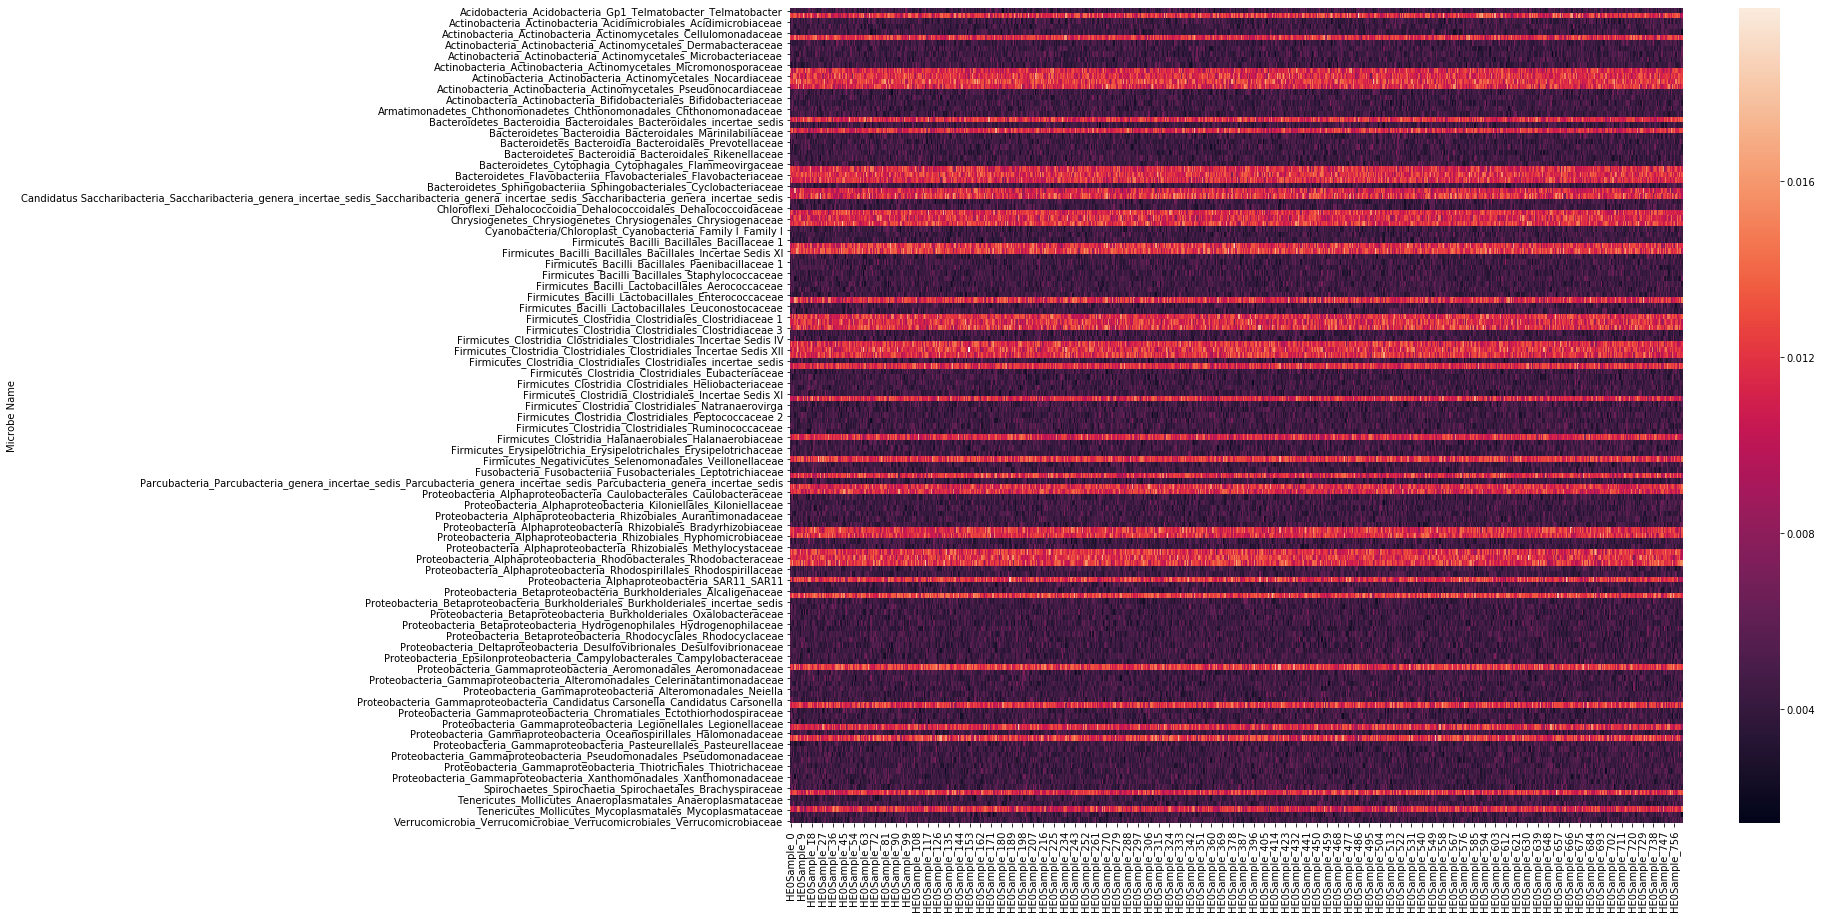

In [15]:
plt.figure(figsize=(20,15))
plot_ra_he0 = hmap(df_ra_he0);
figure = plot_ra_he0.get_figure()
figure.savefig('df_ra_he0.png', bbox_inches= 'tight')

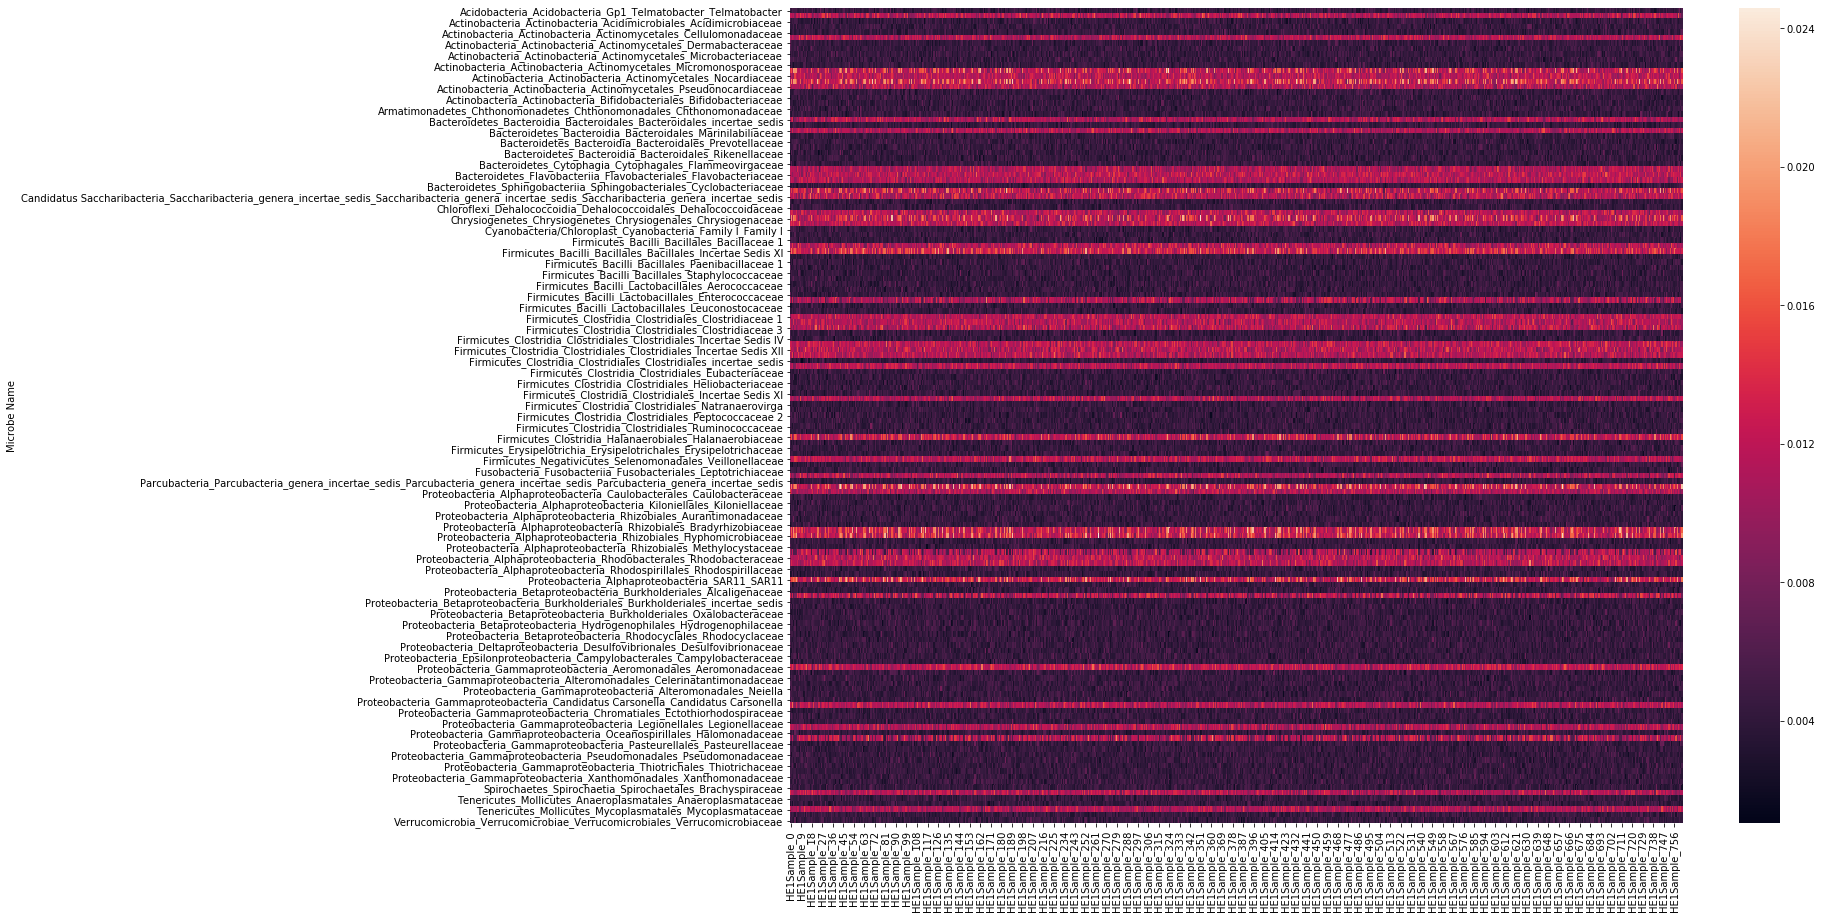

In [16]:
plt.figure(figsize=(20,15))
plot_ra_he1 = hmap(df_ra_he1);
figure = plot_ra_he0.get_figure()
figure.savefig('df_ra_he1.png', bbox_inches= 'tight')

# Task 2: Statistical Analysis

## 1. Kolmogorov-Smirnov (KS) Test

### a. p-value for Two-Sample KS Test

In [17]:
pValue_Microbes = []
for indexName in df_ra_he1.index:
    pValue = ks2(df_ra_he0.loc[indexName], df_ra_he1.loc[indexName]).pvalue
    pValue_Microbes.append(pValue)
df_pValue_Microbes = pd.DataFrame({'Microbe Name': df_ra_he1.index,
                                  'P-Value': pValue_Microbes}).set_index('Microbe Name')
df_pValue_Microbes.head()

,P-Value
Microbe Name,
Acidobacteria_Acidobacteria_Gp1_Telmatobacter_Telmatobacter,0.177747
Acidobacteria_Acidobacteria_Gp3_Gp3_Gp3,0.002248
Actinobacteria_Actinobacteria_Acidimicrobiales_Acidimicrobiaceae,0.086320
Actinobacteria_Actinobacteria_Actinomycetales_Actinomycetaceae,0.909664
Actinobacteria_Actinobacteria_Actinomycetales_Cellulomonadaceae,0.726977


### b. Null Hypothesis of the KS Test in our Context

### c. Number of Genes with Significantly Altered Expression at Various Alpha Values

In [18]:
alpha = [0.1, 0.05, 0.01, 0.005, 0.001]
altered_Microbes = []
for a in alpha:
    altered_Microbes.append(len(df_pValue_Microbes[df_pValue_Microbes['P-Value']<=a]))
df_altered_Microbes = pd.DataFrame({'Alpha': alpha,
                                  'Altered Microbes': altered_Microbes}).set_index('Alpha')
df_altered_Microbes

,Altered Microbes
Alpha,
0.100,48
0.050,36
0.010,27
0.005,24
0.001,20


## 2. Multiple Testing

### a. P-value

when p-value is less than 0.05, it means the samples do not come from same distribution, otherwise, they come from same distribution.

### b. P-value Distribution

When the null hypothesis is true and the underlying random variable is continuous, then the probability distribution of the p-value is uniform on the interval [0,1]. However, if the alternative hypothesis is true, the distribution is dependent on sample size and the true value of the parameter being studied.

Source: https://en.wikipedia.org/wiki/P-value

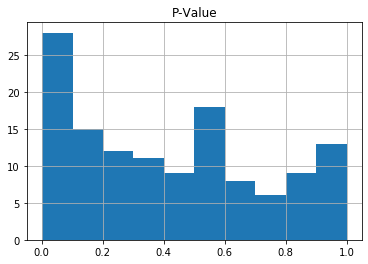

In [19]:
df_pValue_Microbes[df_pValue_Microbes['P-Value']>0.001].hist(bins=10);

### c. Expected Number of Significant p-values

In [21]:
df_altered_Microbes['Expected Altered Microbes'] = [149*a for a in alpha]
df_altered_Microbes

,Altered Microbes,Expected Altered Microbes
Alpha,,
0.100,48,14.900
0.050,36,7.450
0.010,27,1.490
0.005,24,0.745
0.001,20,0.149


### d. Q-Q plot of p-values

#### i. 

In [74]:
np.random.seed(1000)
expected_pValue = np.random.uniform(0,1,149)

#### ii. 

In [77]:
log_exp_pValue = -np.log10(expected_pValue)
log_obs_pValue = -np.log10(pValue_Microbes)

#### iii. 

In [71]:
sort_exp_pValue = np.sort(log_exp_pValue)
sort_obs_pValue = np.sort(log_obs_pValue)

#### iv. 

(-2, 10)

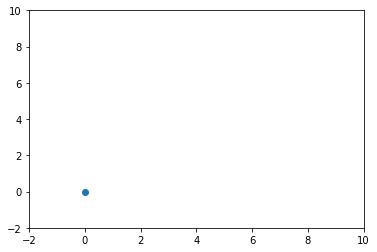

In [72]:
plt.scatter(sort_exp_pValue[0],sort_obs_pValue[0]);
plt.xlim([-2,10])
plt.ylim([-2,10])

#### v. 

(0, 10)

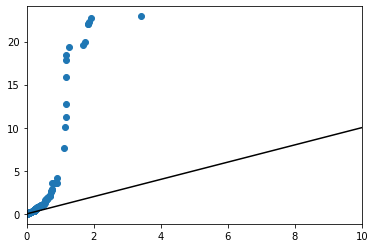

In [73]:
plt.scatter(sort_exp_pValue,sort_obs_pValue);
x = np.linspace(0,10,1000)
plt.plot(x, x, color='black')
plt.xlim([0,10])

#### vi. 

### e. Follow-up Questions

#### i. 

#### ii. 

# Task 3: Dimensionality Reduction and Clustering

## 1. PCA

### a. Performing PCA


### b. Ordering Components

### c. Scatter Plot of Microbe Abundance

## 2. t-SNE

### a. Performing t-SNE

### b. Comparing with PCA

## 3. Clustering

### a. K-Means

### b. GMM

### c. Single and Complete Linkage Hierarchical

### d. Single vs Complete Link Hierarchical Clustering

### e. Comparing Clustering Techniques

### f. What do Clusters Represent

### g. Deciding on Number of Clusters

# Task 4: Interpreting Results

## 1. Identify Microbes with Altered Abundance Levels

### a. Determine if each HE1 Subpopulation shows altered abundance levels

### b. Identify Most Similar HE0 Clusters to Affected HE1 Clusters

### c. Identify Microbes with Significantly Altered Relative Abundance

## 2. Identify How Abundance Changes

### a. Microbes which increase and decrease

### b. Biological Relations